# Analisis Data COVID-19
### Latar Belakang Project

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

### Bagaimana Analisis Data Covid-19 di Sulawesi Tengah?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Sulawesi Tengah, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_SULAWESI_TENGAH.json.

In [76]:
#Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi get() dari library requests.
import requests
import json
resp_sulteng = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_TENGAH.json')

In [77]:
'''Saat menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah membuat sebuah permintaan kepada server penyedia API.
Permintaan tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah dibuat
memiliki informasi respon oleh server.
200 Artinya permintaan sukses dipenuhi.
404 Artinya berkas yang diminta tidak dapat ditemukan.
500 Artinya akses permintaan ditolak.
501 Artinya terjadi kesalahan pada server.
'''
print(resp_sulteng)

<Response [200]>


In [78]:
#mengetahui metadata apa saja yang tersimpan
print(resp_sulteng.headers)

{'Server': 'nginx', 'Date': 'Fri, 16 Apr 2021 09:07:48 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Fri, 16 Apr 2021 08:57:26 GMT', 'ETag': 'W/"60795176-153e1"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [79]:
cov_sulteng_raw = resp_sulteng.json()

In [80]:
print(cov_sulteng_raw)

{'last_date': '2021-04-15', 'provinsi': 'SULAWESI TENGAH', 'kasus_total': 11722, 'kasus_tanpa_tgl': 0, 'kasus_dengan_tgl': 11722, 'meninggal_persen': 2.644599897628391, 'meninggal_tanpa_tgl': 0, 'meninggal_dengan_tgl': 310, 'sembuh_persen': 92.16857191605527, 'sembuh_tanpa_tgl': 0, 'sembuh_dengan_tgl': 10804, 'list_perkembangan': [{'tanggal': 1585180800000, 'KASUS': 1, 'MENINGGAL': 0, 'SEMBUH': 0, 'DIRAWAT_OR_ISOLASI': 1, 'AKUMULASI_KASUS': 1, 'AKUMULASI_SEMBUH': 0, 'AKUMULASI_MENINGGAL': 0, 'AKUMULASI_DIRAWAT_OR_ISOLASI': 1}, {'tanggal': 1585267200000, 'KASUS': 0, 'MENINGGAL': 0, 'SEMBUH': 0, 'DIRAWAT_OR_ISOLASI': 0, 'AKUMULASI_KASUS': 1, 'AKUMULASI_SEMBUH': 0, 'AKUMULASI_MENINGGAL': 0, 'AKUMULASI_DIRAWAT_OR_ISOLASI': 1}, {'tanggal': 1585353600000, 'KASUS': 1, 'MENINGGAL': 0, 'SEMBUH': 0, 'DIRAWAT_OR_ISOLASI': 1, 'AKUMULASI_KASUS': 2, 'AKUMULASI_SEMBUH': 0, 'AKUMULASI_MENINGGAL': 0, 'AKUMULASI_DIRAWAT_OR_ISOLASI': 2}, {'tanggal': 1585440000000, 'KASUS': 0, 'MENINGGAL': 0, 'SEMBUH': 0,

In [81]:
print('Jumlah kolom pada data : ', len(cov_sulteng_raw))

Jumlah kolom pada data :  13


In [82]:
print('Nama-nama elemen utama : ', cov_sulteng_raw.keys())

Nama-nama elemen utama :  dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [83]:
print('Jumlah total kasus COVID-19 di Sulawesi Tengah : %d' %cov_sulteng_raw['kasus_total'])

Jumlah total kasus COVID-19 di Sulawesi Tengah : 11722


In [84]:
print('Persentase kematian akibat COVID-19 di Sulawesi Tengah : %f%%' %cov_sulteng_raw['meninggal_persen'])

Persentase kematian akibat COVID-19 di Sulawesi Tengah : 2.644600%


In [85]:
print('Persentase kesembuhan dari COVID-19 di Sulawesi Tengah : %f%%' %cov_sulteng_raw['sembuh_persen'])

Persentase kesembuhan dari COVID-19 di Sulawesi Tengah : 92.168572%


In [86]:
import numpy as np
import pandas as pd
cov_sulteng = pd.DataFrame(cov_sulteng_raw['list_perkembangan'])

In [87]:
cov_sulteng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       386 non-null    int64
 1   KASUS                         386 non-null    int64
 2   MENINGGAL                     386 non-null    int64
 3   SEMBUH                        386 non-null    int64
 4   DIRAWAT_OR_ISOLASI            386 non-null    int64
 5   AKUMULASI_KASUS               386 non-null    int64
 6   AKUMULASI_SEMBUH              386 non-null    int64
 7   AKUMULASI_MENINGGAL           386 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  386 non-null    int64
dtypes: int64(9)
memory usage: 27.3 KB


In [88]:
cov_sulteng.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1585180800000,1,0,0,1,1,0,0,1
1,1585267200000,0,0,0,0,1,0,0,1
2,1585353600000,1,0,0,1,2,0,0,2
3,1585440000000,0,0,0,0,2,0,0,2
4,1585526400000,0,0,0,0,2,0,0,2


In [89]:
covSultengNew = (cov_sulteng.drop(columns=[item for item in cov_sulteng.columns
                                       if item.startswith('AKUMULASI')
                                       or item.startswith('DIRAWAT')])
             .rename(columns=str.lower)
             .rename(columns={'kasus':'kasus_baru'})
             )
covSultengNew['tanggal'] = pd.to_datetime(cov_sulteng['tanggal']*1e6, unit='ns')

In [90]:
print('Lima data teratas : \n', covSultengNew.head())

Lima data teratas : 
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-26           1          0       0
1 2020-03-27           0          0       0
2 2020-03-28           1          0       0
3 2020-03-29           0          0       0
4 2020-03-30           0          0       0


<Figure size 432x288 with 0 Axes>

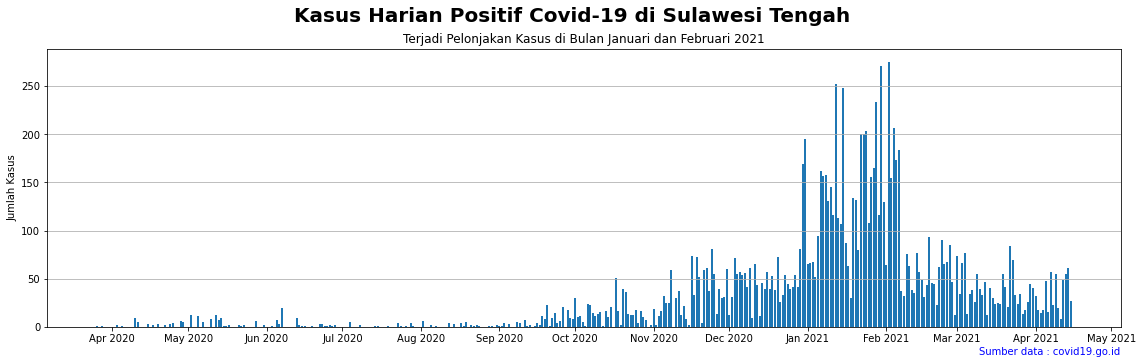

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(data=covSultengNew, x='tanggal', height='kasus_baru')
fig.suptitle('Kasus Harian Positif Covid-19 di Sulawesi Tengah', y=1.00, fontsize=20, fontweight='bold', ha='center')
ax.set_title('\nTerjadi Pelonjakan Kasus di Bulan Januari dan Februari 2021')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid19.go.id', ha='right', color='blue', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

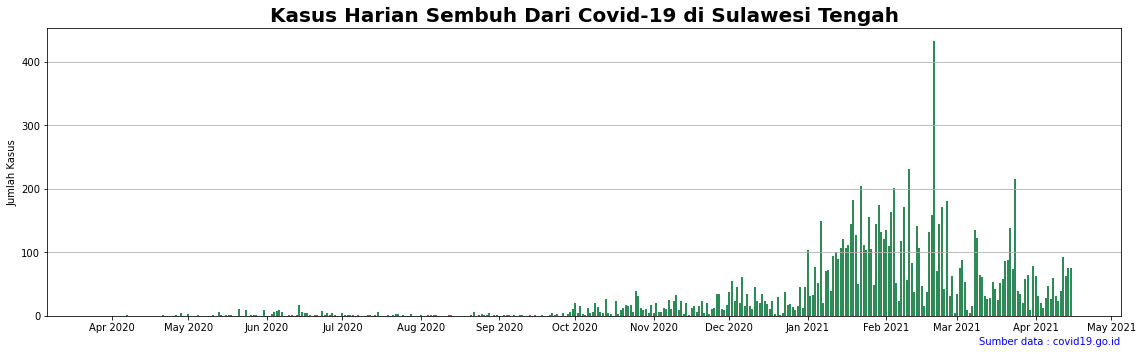

In [92]:
plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(data=covSultengNew, x='tanggal', height='sembuh', color='seagreen')
ax.set_title('Kasus Harian Sembuh Dari Covid-19 di Sulawesi Tengah', fontsize=20, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1,'Sumber data : covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

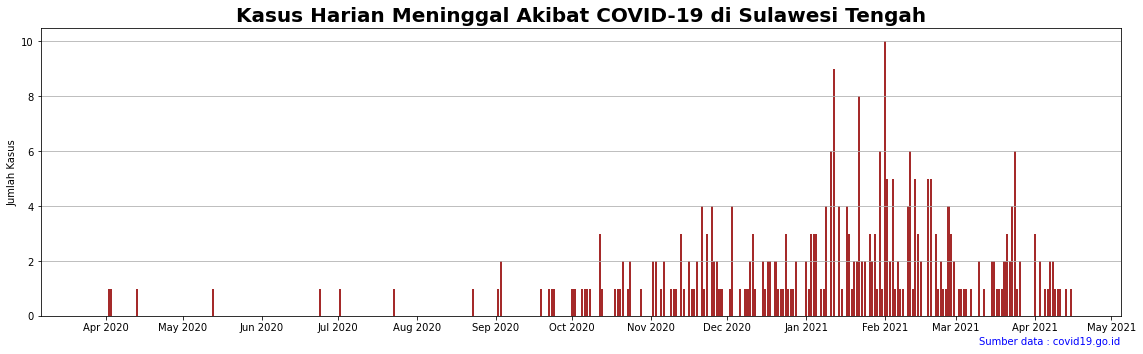

In [93]:
plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(data=covSultengNew, x='tanggal', height='meninggal', color='brown')
ax.set_title('Kasus Harian Meninggal Akibat COVID-19 di Sulawesi Tengah', fontsize=20, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [94]:
covSultengPekanan = (covSultengNew.set_index('tanggal')['kasus_baru']
                    .resample('W')
                    .sum()
                    .reset_index()
                    .rename(columns={'kasus_baru' : 'jumlah'})
                    )
covSultengPekanan['tahun'] = covSultengNew['tanggal'].apply(lambda x: x.year)
covSultengPekanan['pekan_ke'] = covSultengNew['tanggal'].apply(lambda x: x.weekofyear)
covSultengPekanan = covSultengPekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info Sulawesi Tengah Pekanan : ')
print(covSultengPekanan.info())
print('Lima data teratas : \n', covSultengPekanan.head())

Info Sulawesi Tengah Pekanan : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     56 non-null     int64
 1   pekan_ke  56 non-null     int64
 2   jumlah    56 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB
None
Lima data teratas : 
    tahun  pekan_ke  jumlah
0   2020        13       2
1   2020        13       3
2   2020        13      14
3   2020        13       8
4   2020        14       9


In [95]:
covSultengPekanan['jumlah_pekanlalu'] = covSultengPekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
covSultengPekanan['lebih_baik'] = covSultengPekanan['jumlah'] < covSultengPekanan['jumlah_pekanlalu']
print('Sepuluh Data teratas : \n', covSultengPekanan.head(10))

Sepuluh Data teratas : 
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        13       2                 0       False
1   2020        13       3                 2       False
2   2020        13      14                 3       False
3   2020        13       8                14        True
4   2020        14       9                 8       False
5   2020        14      23                 9       False
6   2020        14      24                23       False
7   2020        14      32                24       False
8   2020        14       5                32        True
9   2020        14       8                 5       False


<Figure size 432x288 with 0 Axes>

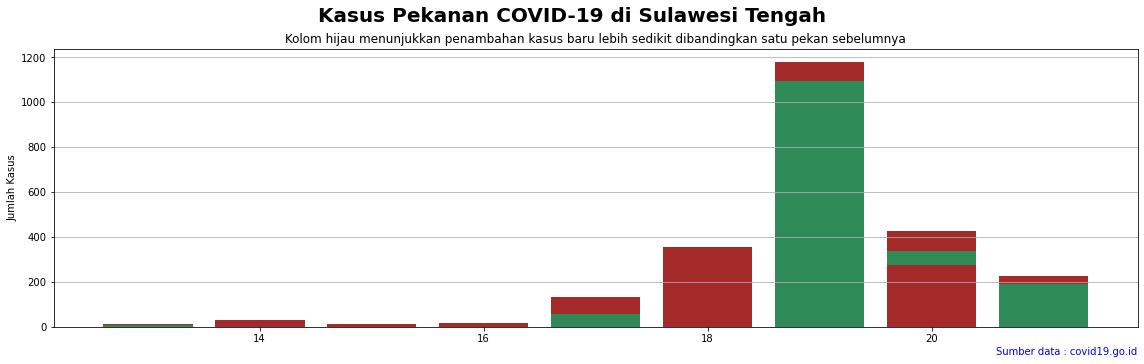

In [96]:
import matplotlib.pyplot as plt
plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(data=covSultengPekanan, x='pekan_ke', height='jumlah', color=['seagreen' if x is True else 'brown' for x in covSultengPekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan COVID-19 di Sulawesi Tengah', y=1.00, fontsize=20, fontweight='bold', ha='center')
ax.set_title('\nKolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [97]:
covSultengAkumulasi = covSultengNew[['tanggal']].copy()
covSultengAkumulasi['akumulasi_aktif'] = (covSultengNew['kasus_baru']-covSultengNew['sembuh']-covSultengNew['meninggal']).cumsum()
covSultengAkumulasi['akumulasi_sembuh'] = covSultengNew['sembuh'].cumsum()
covSultengAkumulasi['akumulasi_meninggal'] = covSultengNew['meninggal'].cumsum()
covSultengAkumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
381,2021-04-11,725,10497,308
382,2021-04-12,681,10590,308
383,2021-04-13,672,10653,309
384,2021-04-14,657,10729,309
385,2021-04-15,608,10804,310


<Figure size 432x288 with 0 Axes>

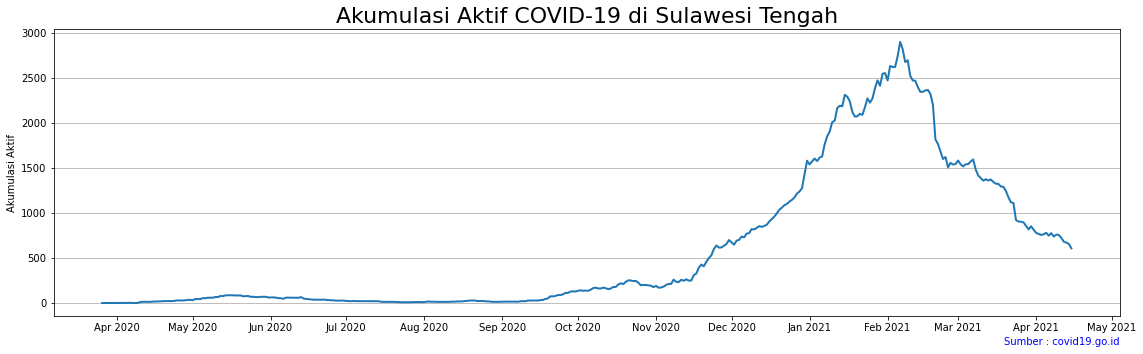

In [98]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
ax.plot('tanggal', 'akumulasi_aktif', data=covSultengAkumulasi, lw=2)
ax.set_title('Akumulasi Aktif COVID-19 di Sulawesi Tengah', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.1, 'Sumber : covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

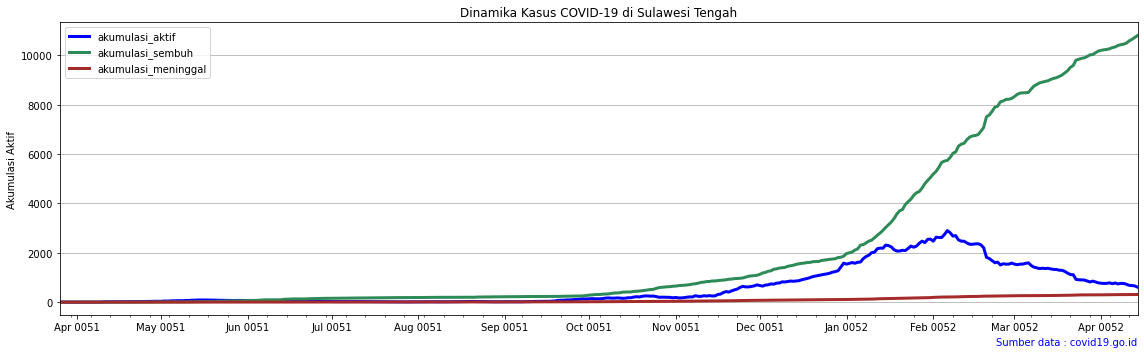

In [99]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(16,5))
covSultengAkumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['blue','seagreen','brown'])
ax.set_title('Dinamika Kasus COVID-19 di Sulawesi Tengah')
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.1, 'Sumber data : covid19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()